In [1]:
import pandas as pd
import numpy as np

from scipy.sparse import csr_matrix
from sklearn.metrics import adjusted_rand_score

from algorithms.utils.print_matrix import print_matrix
from algorithms.utils.percentage_nonzero import percentage_nonzero

from algorithms.similarity_graph import similarity_graph
from algorithms.plots import datasets_plot, clusters_plot
from algorithms.clustering_methods import k_mean, gmm_and_agg
from algorithms.connected_components import compute_connected_components
from algorithms.compute_eigenvalues import compute_eigen, num_cluster
from algorithms.degree_laplacian import compute_degree_matrix, compute_laplacian_matrix

random_state = 336648

#### 1 Construction of $k$-Nearest Neighbor Similarity Graph and Adjacency Matrix $W$

In [2]:
# Load Circle dataset
circle_data = pd.read_csv('data/Circle.csv', header=None, delimiter=',').to_numpy()

# Circle Dataset (no labels, so no splitting needed)
X_circle = circle_data[:, :2]
circle_data.shape

(900, 2)

In [3]:
# Load Spiral
spiral_data = pd.read_csv('data/Spiral.csv', header=None, delimiter=',').to_numpy()

# Spiral Dataset (split features and labels)
X_spiral = spiral_data[:, :2]
labels_spiral = spiral_data[:, 2]

spiral_data.shape

(312, 3)

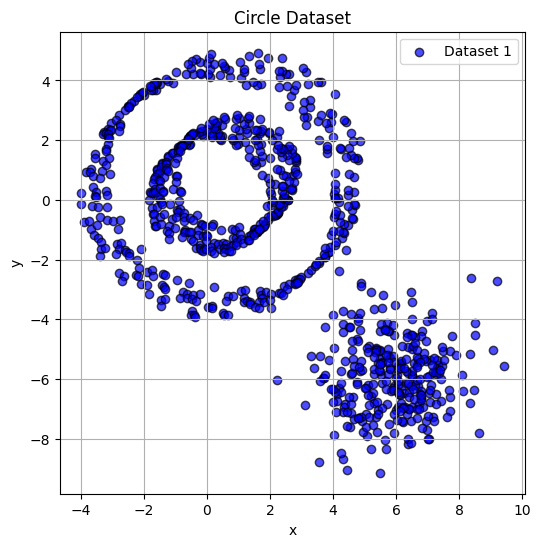

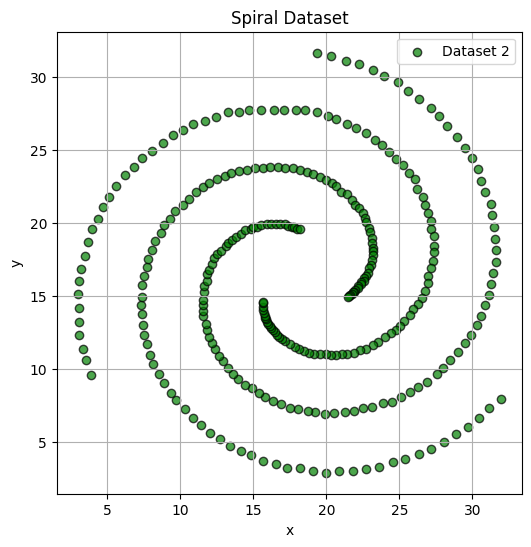

In [4]:
datasets_plot(circle_data, 'Circle Dataset', X_spiral, 'Spiral Dataset' )

In [5]:
k = 20
sigma = 1

W_circle = similarity_graph(circle_data, k=k, sigma=sigma)
W_spiral = similarity_graph(spiral_data, k=k, sigma=sigma)

c_percentage = percentage_nonzero(W_circle)
s_percentage = percentage_nonzero(W_spiral)

print_matrix(W_circle, title="W_circle", precision=2)
print_matrix(W_spiral, title="W_spiral", precision=2)

W_circle:

[[0.   0.99 0.   ... 0.   0.   0.  ]
 [0.99 0.   0.   ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.   0.   0.  ]
 ...
 [0.   0.   0.   ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.   0.   0.  ]]


W_spiral:

[[0.   0.59 0.14 ... 0.   0.   0.  ]
 [0.59 0.   0.63 ... 0.   0.   0.  ]
 [0.14 0.63 0.   ... 0.   0.   0.  ]
 ...
 [0.   0.   0.   ... 0.   0.97 0.94]
 [0.   0.   0.   ... 0.97 0.   1.  ]
 [0.   0.   0.   ... 0.94 1.   0.  ]]




In [6]:
print("Percentage of non-zero elements (Circle): {:.2f}%".format(c_percentage))
print("Percentage of non-zero elements (Spiral): {:.2f}%".format(s_percentage))

Percentage of non-zero elements (Circle): 2.54%
Percentage of non-zero elements (Spiral): 7.86%


#### 2 Construction of Degree Matrix $D$ and Laplacian Matrix $L = D - W$ in Sparse Format

In [7]:
# Convert W_circle and W_spiral to sparse format
W_circle_sparse = csr_matrix(W_circle)
W_spiral_sparse = csr_matrix(W_spiral)

# Compute degree and Laplacian matrices for Circle
D_circle = compute_degree_matrix(W_circle_sparse)
L_circle = compute_laplacian_matrix(W_circle_sparse)

# Compute degree and Laplacian matrices for Spiral
D_spiral = compute_degree_matrix(W_spiral_sparse)
L_spiral = compute_laplacian_matrix(W_spiral_sparse)

#### 3 Computation of the Number of Connected Components of the Similarity Graph

In [8]:
# Compute number of connected components for Circle dataset
num_components_circle = compute_connected_components(L_circle)
print(f"Number of connected components (Circle): {num_components_circle}")

# Compute number of connected components for Spiral dataset
num_components_spiral = compute_connected_components(L_spiral)
print(f"Number of connected components (Spiral): {num_components_spiral}")

Number of connected components (Circle): 1
Number of connected components (Spiral): 1


#### 4 Computation of Small Eigenvalues of $L$ and Determination of the Number of Clusters $M$

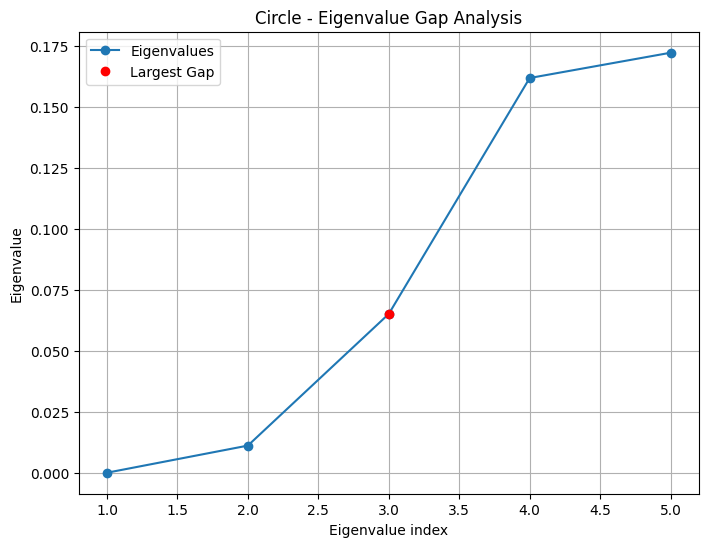

Number of clusters for Circle based on largest eigenvalue gap: 3


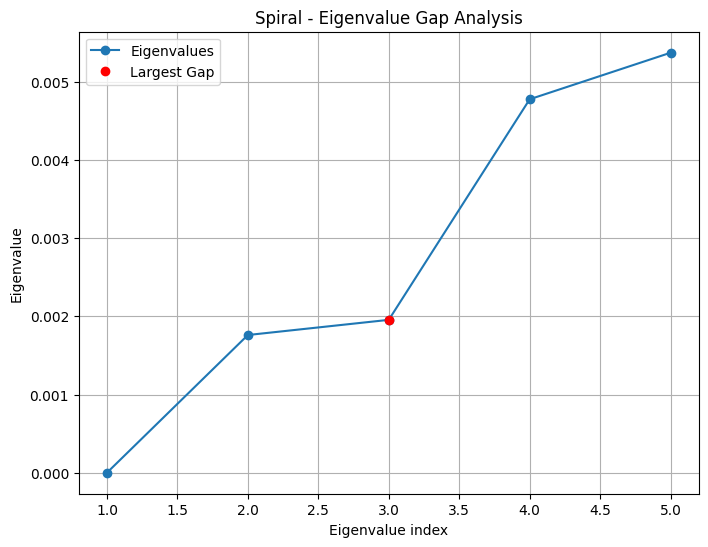

Number of clusters for Spiral based on largest eigenvalue gap: 3


In [9]:
circle_eigvals, circle_eigvecs, circle_sorted_eigvals = compute_eigen(L_circle, k = 5)
circle_num_clusters = num_cluster(circle_sorted_eigvals, k=5,title='Circle' )
spiral_eigvals, spiral_eigvecs, spiral_sorted_eigvals = compute_eigen(L_spiral, k=5)
spiral_num_clusters = num_cluster(spiral_sorted_eigvals, k=5, title='Spiral' )

#### 5 Computation of $M$ Eigenvectors Corresponding to the Smallest Eigenvalues and Construction of the Matrix $U \in \mathbb{R}^{N \times M}$

In [10]:
circle_eigvals, circle_eigvecs, circle_sorted_eigvals = compute_eigen(L_circle, k = circle_num_clusters)
spiral_eigvals, spiral_eigvecs, spiral_sorted_eigvals = compute_eigen(L_spiral, k=spiral_num_clusters)

# Define the matrix Circle_U with the eigenvectors of L_circle_sparse as columns
U_circle = np.stack([circle_eigvecs[:, i] for i in range(circle_num_clusters)], axis=1)

# Define the matrix Spiral_U with the eigenvectors of L_spiral_sparse as columns
U_spiral = np.stack([spiral_eigvecs[:, i] for i in range(spiral_num_clusters)], axis=1)

#### 6 Clustering of Points in $\mathbb{R}^M$ Using $k$-Means Algorithm

In [11]:
# Perform k-means clustering for Circle dataset
circle_labels_kmean = k_mean(U_circle, circle_num_clusters, random_state)
print(f"Cluster labels (Circle): {circle_labels_kmean}")

Cluster labels (Circle): [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1


In [12]:
# Perform k-means clustering for Spiral dataset
spiral_labels_kmean = k_mean(U_spiral, spiral_num_clusters, random_state)
print(f"Cluster labels (Spiral): {spiral_labels_kmean}")

Cluster labels (Spiral): [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


#### 7 Assignment of Original Points in $X$ to Clusters Based on Corresponding Rows in $U$

In [13]:
# Circle
C = [X_circle[circle_labels_kmean == i] for i in range(circle_num_clusters)]

# Spiral
S = [X_spiral[spiral_labels_kmean == i] for i in range(spiral_num_clusters)]

#### 8 Visualization of Clusters in $X$ Using Different Colors

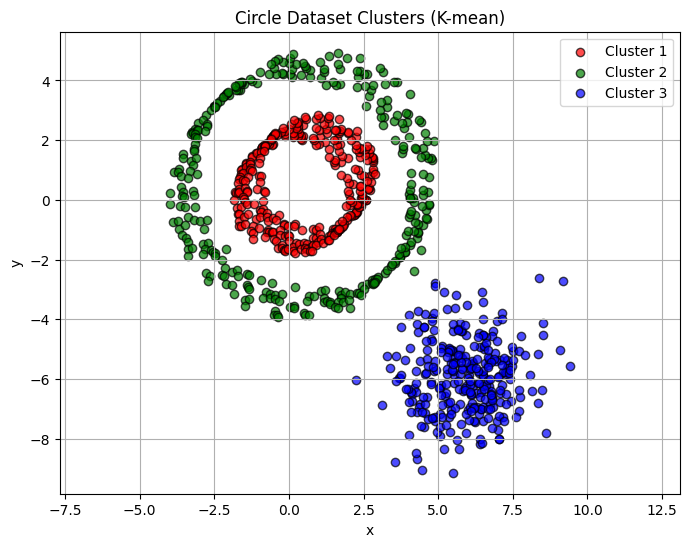

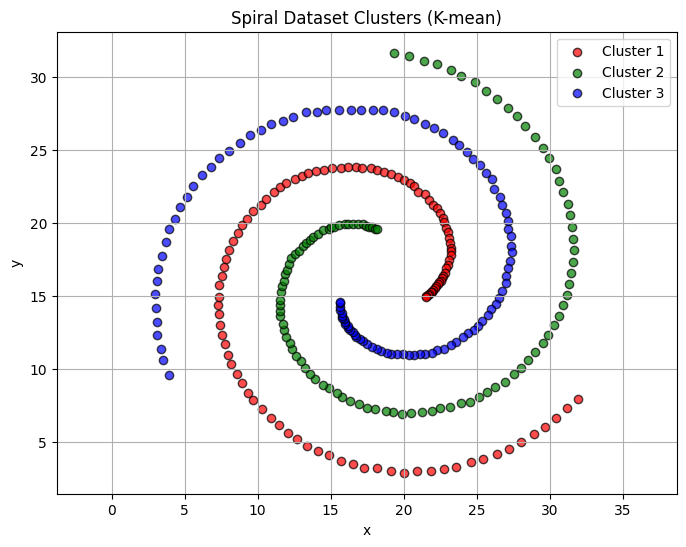

In [14]:
# Plot Circle Clusters
clusters_plot(C, circle_num_clusters,'Circle Dataset Clusters (K-mean)')

# Plot Spiral Clusters
clusters_plot(S, spiral_num_clusters, 'Spiral Dataset Clusters (K-mean)')

#### 9 Comparison of Clustering Results Using Gaussian Mixture and Agglomerative Methods

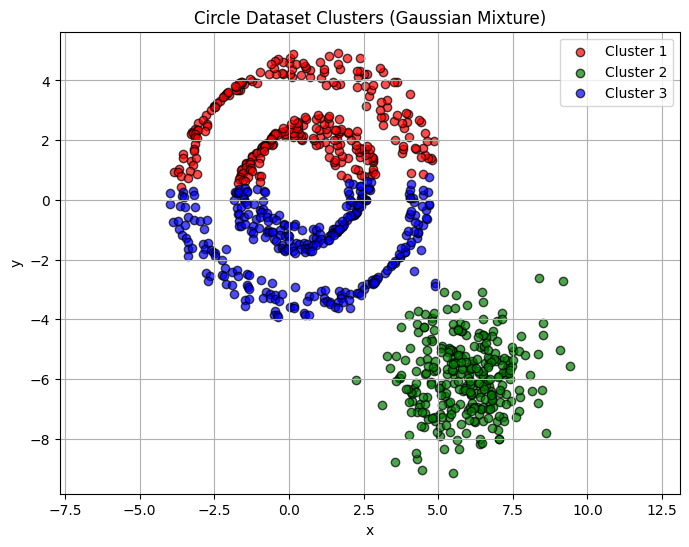

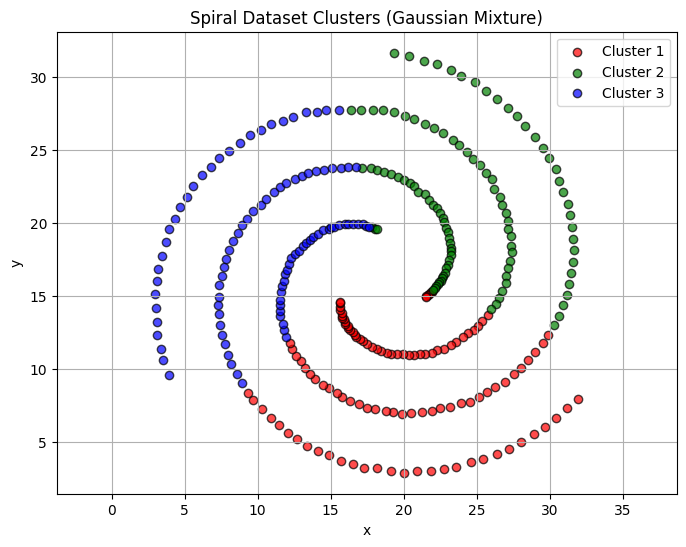

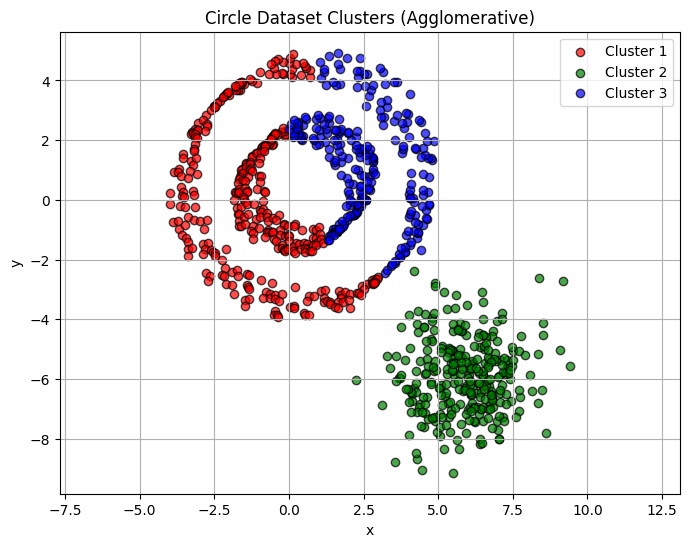

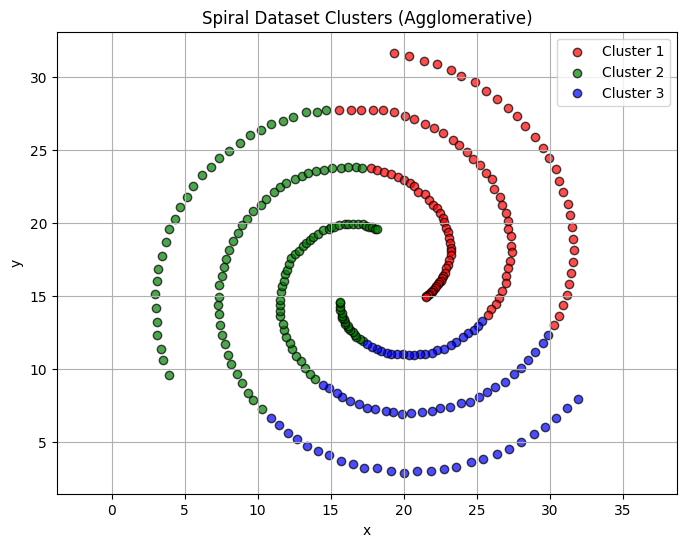

In [15]:
# Perform GMM and AGG clustering on Circle dataset
circle_gmm_clusters, circle_labels_gmm, circle_agg_clusters, circle_labels_agg = gmm_and_agg(X_circle, circle_num_clusters, random_state)

# Perform GMM and AGG clustering on Spiral dataset
spiral_gmm_clusters, spiral_labels_gmm, spiral_agg_clusters, spiral_labels_agg = gmm_and_agg(X_spiral, spiral_num_clusters, random_state)

# Plot GMM clusters for Circle dataset
clusters_plot(circle_gmm_clusters, circle_num_clusters, title="Circle Dataset Clusters (Gaussian Mixture)")
# Plot GMM clusters for Spiral dataset
clusters_plot(spiral_gmm_clusters, spiral_num_clusters, title="Spiral Dataset Clusters (Gaussian Mixture)")

# Plot AGG clusters for Circle dataset
clusters_plot(circle_agg_clusters, circle_num_clusters, title="Circle Dataset Clusters (Agglomerative)")
# Plot AGG clusters for Spiral dataset
clusters_plot(spiral_agg_clusters, spiral_num_clusters, title="Spiral Dataset Clusters (Agglomerative)")

In [16]:
adjusted_rand_score(labels_spiral, spiral_labels_kmean)

1.0

In [17]:
adjusted_rand_score(labels_spiral, spiral_labels_gmm)

-0.00509058447171381

In [18]:
adjusted_rand_score(labels_spiral, spiral_labels_agg)

-0.0008805161994257776